## _Pycaret_
We will use _Pycaret_ in order to train multiple models simultaneously and outputs tables comparing the performance of each model by considering a few performance metrics. We will use three datasets:

<ul>
  <li>Dataset 1 : preprocessed node attributes</li>
  <li>Dataset 2 : preprocessed node attributes & comparison features</li>
  <li>Dataset 3 : node features & graph features</li>
</ul>

In [1]:
from pycaret.classification import *
import pandas as pd

Data preprocessing for _Pycaret_

In [2]:
def init_dataset_for_pycaret(dataset):
    train_data = dataset.sample(frac=0.8, random_state=786)
    test_data = dataset.drop(train_data.index)

    train_data["fold_groups"] = train_data.index
    test_data["fold_groups"] = test_data.index

    train_data.reset_index(drop=True, inplace=True)
    test_data.reset_index(drop=True, inplace=True)
    return train_data,test_data

dataset_1 = pd.read_pickle('data/dataset1.pkl')
dataset_2= pd.read_pickle('data/dataset2.pkl')
dataset_3 = pd.read_pickle('data/dataset3.pkl')


train_data_1, test_data_1 = init_dataset_for_pycaret(dataset_1)
train_data_2, test_data_2 = init_dataset_for_pycaret(dataset_2)
train_data_3, test_data_3 = init_dataset_for_pycaret(dataset_3)


print('--- Dataset 1 ---')
print('Data for Modeling: ' + str(train_data_1.shape))
print('Data For Predictions: ' + str(test_data_1.shape))

print('--- Dataset 2 ---')
print('Data for Modeling: ' + str(train_data_2.shape))
print('Data For Predictions: ' + str(test_data_2.shape))

print('--- Dataset 3 ---')
print('Data for Modeling: ' + str(train_data_3.shape))
print('Data For Predictions: ' + str(test_data_3.shape))

--- Dataset 1 ---
Data for Modeling: (18907, 8)
Data For Predictions: (4727, 8)
--- Dataset 2 ---
Data for Modeling: (18907, 13)
Data For Predictions: (4727, 13)
--- Dataset 3 ---
Data for Modeling: (18886, 18)
Data For Predictions: (4721, 18)


As can be seen, Dataset 3 has more features (18) than Dataset 2 (13) and this has more features than Dataset 1 (8)

## Train multiple models
Below several models are trained on the three datasets. The results are three tables, one for each dataset with metrics for each method applied

### Dataset 1

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:55:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

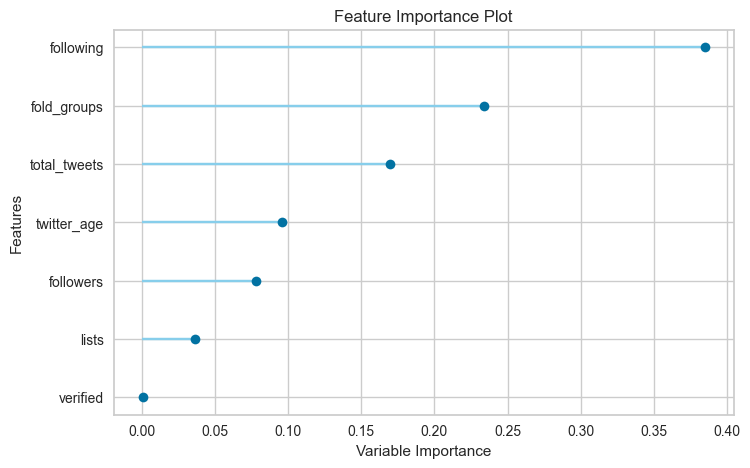

                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.5229  0.6811  0.5229  0.5074   
lightgbm  Light Gradient Boosting Machine    0.5221  0.6792  0.5221  0.5033   
rf               Random Forest Classifier    0.5107  0.6651  0.5107  0.4919   
et                 Extra Trees Classifier    0.5008  0.6538  0.5008  0.4749   
ada                  Ada Boost Classifier    0.5101  0.6455  0.5101  0.4658   
lda          Linear Discriminant Analysis    0.4668  0.6081  0.4668  0.3937   
lr                    Logistic Regression    0.4600  0.5923  0.4600  0.3955   
qda       Quadratic Discriminant Analysis    0.2600  0.5919  0.2600  0.4065   
nb                            Naive Bayes    0.2848  0.5866  0.2848  0.4034   
knn                K Neighbors Classifier    0.4486  0.5850  0.4486  0.4089   
dt               Decision Tree Classifier    0.4019  0.5534  0.4019  0.4039   
dummy                    Dummy Classifier    0.4568 

In [3]:
s1 = setup(data=train_data_1, target='party', session_id=123,  fold_strategy='groupkfold', fold=3,  fold_groups='fold_groups', test_data=test_data_1)
best_1 = compare_models(sort='AUC')
regression_results_1 = pull()
plot_model(best_1,plot='feature')
print(regression_results_1)

### Dataset 2

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:56:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

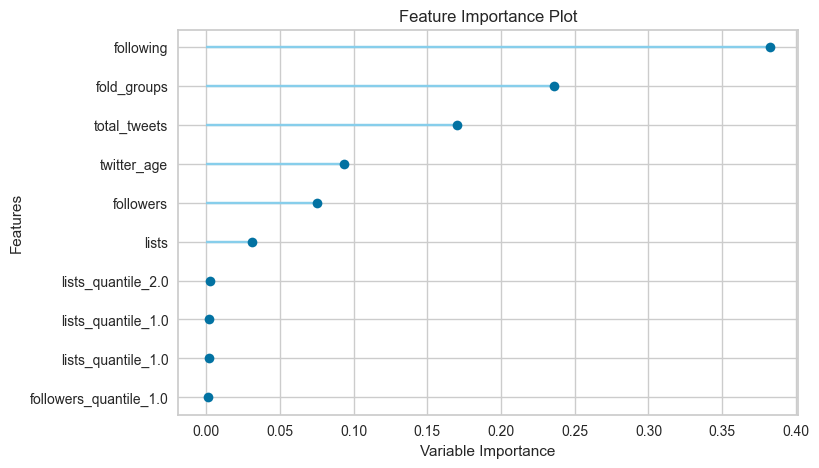

                                 Model  Accuracy     AUC  Recall   Prec.  \
gbc       Gradient Boosting Classifier    0.5228  0.6807  0.5228  0.5052   
rf            Random Forest Classifier    0.4979  0.6498  0.4979  0.4673   
ada               Ada Boost Classifier    0.5114  0.6462  0.5114  0.4675   
lda       Linear Discriminant Analysis    0.4815  0.6389  0.4815  0.4264   
et              Extra Trees Classifier    0.4851  0.6349  0.4851  0.4518   
nb                         Naive Bayes    0.2993  0.5939  0.2993  0.4033   
lr                 Logistic Regression    0.4605  0.5924  0.4605  0.3965   
knn             K Neighbors Classifier    0.4486  0.5850  0.4486  0.4089   
qda    Quadratic Discriminant Analysis    0.1345  0.5791  0.1345  0.3536   
dt            Decision Tree Classifier    0.4023  0.5541  0.4023  0.4046   
dummy                 Dummy Classifier    0.4568  0.5000  0.4568  0.2088   
svm                SVM - Linear Kernel    0.3468  0.0000  0.3468  0.3658   
ridge       

In [4]:
s2 = setup(data=train_data_2, target='party', session_id=123,  fold_strategy='groupkfold', fold=3,  fold_groups='fold_groups', test_data=test_data_2)
best_2 = compare_models(sort='AUC')
regression_results_2 = pull()
plot_model(best_2,plot='feature')
print(regression_results_2)

### Dataset 3

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:57:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

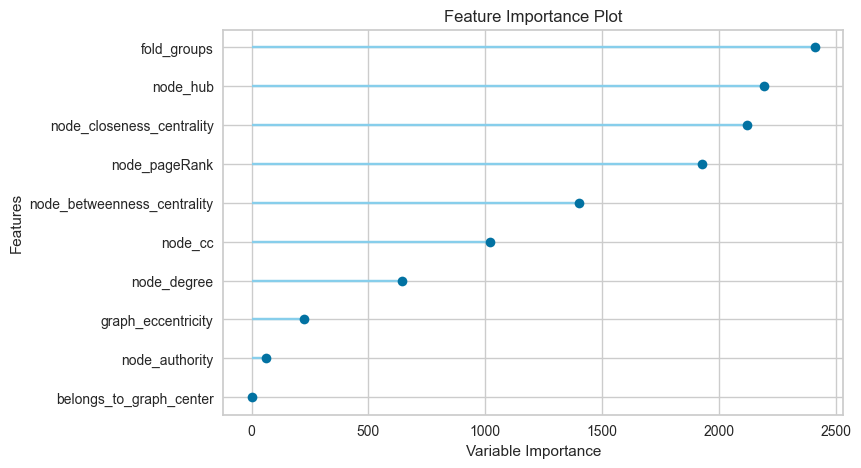

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.6181  0.7780  0.6181  0.5877   
rf               Random Forest Classifier    0.5931  0.7627  0.5931  0.5538   
gbc          Gradient Boosting Classifier    0.5835  0.7517  0.5835  0.5525   
et                 Extra Trees Classifier    0.5819  0.7318  0.5819  0.5506   
ada                  Ada Boost Classifier    0.5408  0.7013  0.5408  0.5081   
lda          Linear Discriminant Analysis    0.5057  0.6902  0.5057  0.4649   
dt               Decision Tree Classifier    0.4924  0.6286  0.4924  0.4972   
nb                            Naive Bayes    0.3785  0.6099  0.3785  0.3373   
lr                    Logistic Regression    0.4561  0.5879  0.4561  0.2853   
knn                K Neighbors Classifier    0.4372  0.5722  0.4372  0.3913   
dummy                    Dummy Classifier    0.4571  0.5000  0.4571  0.2090   
svm                   SVM - Linear Kernel    0.3395 

In [5]:
s3 = setup(data=train_data_3, target='party', session_id=123,  fold_strategy='groupkfold', fold=3,  fold_groups='fold_groups', test_data=test_data_3)
best_3 = compare_models(sort='AUC')
regression_results_3 = pull()
plot_model(best_3,plot='feature')
print(regression_results_3)